In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams.update({'font.size': 16})

In [2]:
### Get results from 2 rounds with checkpointing
rounds = (1,2)
seeds = (1,2,3,4,5)
nfes = (6100, 12101)
# colors = [cm.get_cmap('tab10')(v) for v in (0.05, 0.95, 0.85, 0.15, 0.35)]
colors = [cm.get_cmap('tab10')(v) for v in (0.05, 0.35)]
labels = ['round1','round2']


In [3]:
### read in operators data
operators = []
for i in range(len(rounds)):
    for j in range(len(seeds)):
        r = rounds[i]
        nfe = nfes[i]
        seed = seeds[j]
        df = pd.read_csv(f'results_round{r}/operators/seed{seed}_nfe{nfe}.NFE', sep=' ', header=None)
        for o in ['DE','PCX','SBX','SPX','UM','UNDX']:
            df[o] = pd.read_csv(f'results_round{r}/operators/seed{seed}_nfe{nfe}.{o}', sep=' ', header=None)[0].values
        df.index = df[0]
        df = df.iloc[:, 1:]
        ncols = df.shape[1]
        cols = df.columns
        operators.append(df)

In [4]:
cols

Index(['DE', 'PCX', 'SBX', 'SPX', 'UM', 'UNDX'], dtype='object')

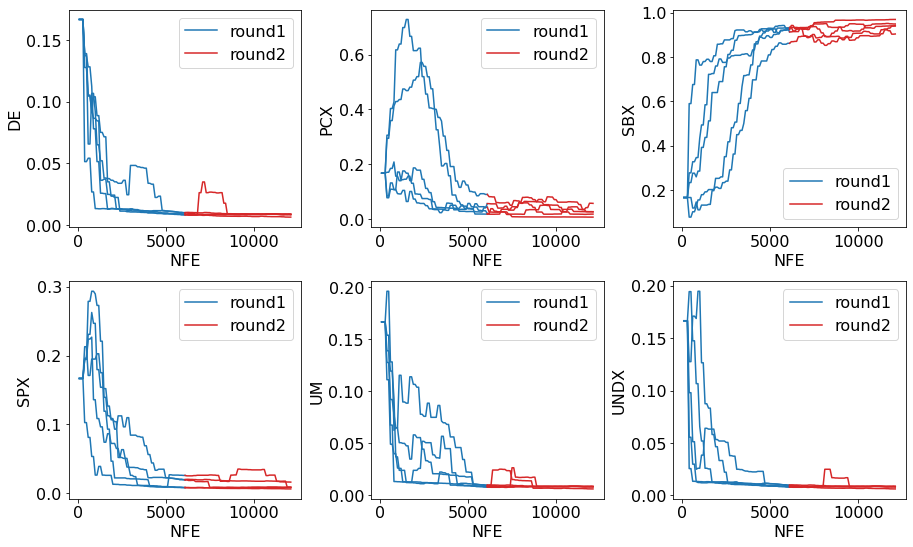

In [5]:
### plot operators
fig, axs = plt.subplots(2,3,figsize=(15,9), gridspec_kw={'hspace':0.25, 'wspace':0.3})
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for r in range(len(rounds)):
        for seed in range(len(seeds)):
            if seed == 0:
                ax.plot(operators[count].iloc[:, c], color=colors[r], label=labels[r])
            else:
                ax.plot(operators[count].iloc[:, c], color=colors[r])
                
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    ax.legend()
    j += 1
    if j == 3:
        j = 0
        k += 1
        
plt.savefig(f'figs/operators.png', bbox_inches='tight')

In [6]:
### get runtime metrics
metrics = []
for i in range(len(rounds)):
    for j in range(len(seeds)):
        r = rounds[i]    
        seed = seeds[j]
        nfe = nfes[i]
        df = pd.read_csv(f'results_round{r}/metrics/seed{seed}_nfe{nfe}.metrics', sep=' ')
        df.index = operators[i].index[-df.shape[0]:]
        df.columns = ['Hypervolume', 'Geerational distance', 'Inverted generational distance', 'Spacing', 'Epsilon indicator', 'Maximum Pareto front error']
        ### insert 0's for missing rows (borg doesn't output metrics until archive is nonzero)
        zero_fes = df.index[0]
        zero_fe_fill = df.iloc[:zero_fes]*0.
        zero_fe_fill.reset_index(inplace=True, drop=True)
        df = df.append(zero_fe_fill)
        df.sort_index(inplace=True)
        ncols = df.shape[1]
        cols = df.columns
        metrics.append(df)

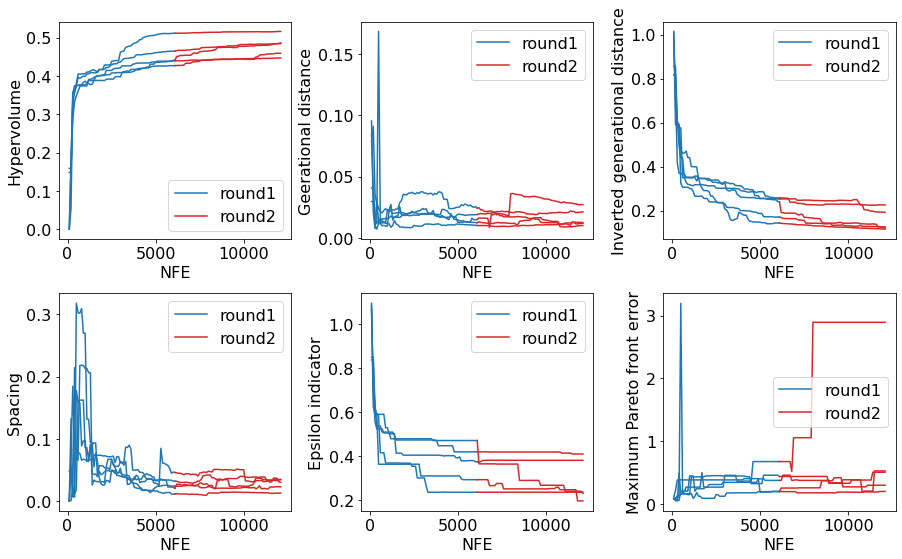

In [7]:
### plot metrics
fig, axs = plt.subplots(2,3,figsize=(15,9), gridspec_kw={'hspace':0.25, 'wspace':0.3})
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for r in range(len(rounds)):
        for seed in range(len(seeds)):
            num_steps = operators[count].shape[0]
            if seed == 0:
                ax.plot(operators[count].index, metrics[count].iloc[-num_steps:, c], color=colors[r], label=labels[r])
            else:
                ax.plot(operators[count].index, metrics[count].iloc[-num_steps:, c], color=colors[r])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    ax.legend()
    j += 1
    if j == 3:
        j = 0
        k += 1
plt.savefig(f'figs/metrics.png', bbox_inches='tight')

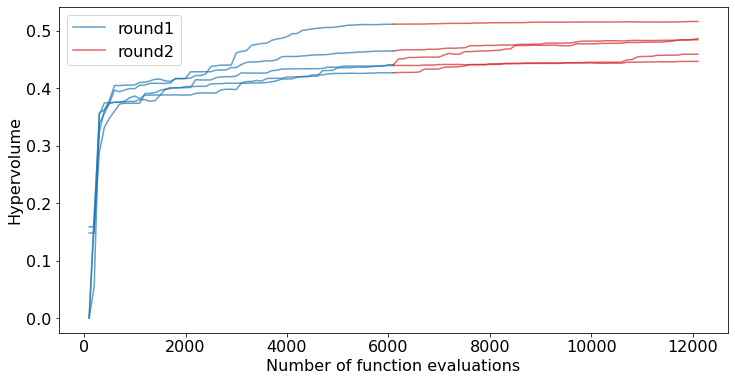

In [8]:
### plot elapsed hypervolume of particular seeds
plt.figure(figsize=(12,6))
count = 0
for r in range(len(rounds)):
    for seed in range(len(seeds)):
        num_steps = operators[count].shape[0]
        if seed==0:
            plt.plot(operators[count].index, metrics[count]['Hypervolume'][-num_steps:], color=colors[r], label=labels[r], alpha=0.7)
        else:
            plt.plot(operators[count].index, metrics[count]['Hypervolume'][-num_steps:], color=colors[r], alpha=0.7)
        count += 1
plt.xlabel('Number of function evaluations')
plt.ylabel('Hypervolume')
plt.legend()
plt.savefig(f'figs/metrics_hv.png', bbox_inches='tight')